In [1]:
import numpy as np
import matplotlib.pyplot as plt
import examples

# Advanced Chemistry Practical: Computational Chemistry

Welcome to the advanced chemistry pratical focusing on [computational chemistry](./README.md). Over the next four weeks you will: 
- gain a understanding of, and familiarity, with molecular dynamics simulations.
- learn how molecular dynamics simulations are performed in practice.
- use molecular dynamics simulations to study the solid state materials, such as batteries and solar cells. 
- rationalise the results of the molecular dynamics simulations in terms of physical chemistry you are familiar with. 

For more details about the learning objectives of this practical, checkout the [lesson plan](https://github.com/symmy596/Advanced_Practical_Chemistry_Teaching/blob/master/LESSONPLAN.md) online. This session will also make use of some of the Python and Jupyter skills that you were introduced to in the first and second year computational laboratory, if you feel that these are not fresh in your mind it might be worth looking back at your work from those previous years. 

This first session will focus on an introduction to **classical molecular dynamics simulation**, if you took the "introduction to Computational Chemistry" (CH20238) module last year this **will** involve some revision. However, it is **important** that you work through all of this introduction as it should make the basis for the methodology section of your report. That said, as with all work that you do this notebook should **not** be your exclusive source of background information about molecular dynamics. Below is a non-exhaustive list of books in the library that can be used for more information. 

- Harvey, J. (2017). *Computational Chemistry*. Oxford, UK. Oxford University Press
    - Bath Library Shelf Reference: 542.85 HAR
- Grant, G. H. & Richards, W. G. (1995). *Computational Chemistry*. Oxford, UK. Oxford University Press
    - Bath Library Shelf Reference: 542.85 GRA
- Leach, A. R. (1996). *Molecular modelling: principles and applications*. Harlow, UK. Longman
    - Bath Library Shelf Reference: 541.6 LEA
- Frenkel, D. & Smit, B. (2002). *Understanding molecular simulation: from algorithms to applications*. San Diego, USA. Academic Press
    - Bath Library Shelf Reference: 541.572.6 FRE
    - Note: This book is a personal favourite, great if you love maths and algorithms but is particularly **hardcore**.
- Allen, M. P. & Tildesley, D. J. (1987). *Computer simulation of liquids*. Oxford, UK. Clarendon Press
    - Bath Library Shelf Reference: 532.9 ALL
    - Note : This is also pretty **hardcore**. 
    
## Introduction to classical molecular dynamics

**Classical molecular dynamics** is one of the most commonly applied techniques in computational chemistry, in particular for the study of large systems such as protein, polymers, batteries materials, and solar cells. In classical molecular dynamics, as you would expect, we use **classical methods** to study the **dynamics** of **molecules**. 

### Classical methods

The term **classical methods** is used to distinguish these from quantum mechanical methods, such as the Hartree-Fock method or Møller–Plesset perturbation theory. In these classical methods, the quantum mechanical **weirdness** is not present, which has a significant impact on the calculation time. The need for quantum mechanics is removed by integrating over all of the electronic orbitals and describing the atom as a fixed electron distribution. This **simplification** has some drawbacks, classical methods are only suitable for the study of molecular ground states, limiting the ability to study reactions. Furthermore, it is necessary to determine some way to **describe** this electron distribution. 

In practice, the model used to describe the electron distribution is usually **isotropic**, e.g. a sphere, with the electron sharing bonds between the atoms described as springs. 

<center>
    <br>
    <img src="./figures/fig001.png" width="400px">
    <i>Figure 1. A pictorial example of the models used in a classical method.</i>
    <br>
</center>

The aim of all chemistry is to understand the **energy** of the given system, therefore we must parameterise the **models** of our system in terms of the energy. For a molecular system, the energy is defined in terms of bonded and non-bonded interactions, 

$$ E_{\text{tot}} = E_{\text{bond}} + E_{\text{angle}} + E_{\text{dihedral}} + E_{\text{non-bond}} $$

where, $E_{\text{bond}}$, $E_{\text{angle}}$, and $E_{\text{dihedral}}$ are the energies associated with all of the bonded interactions, and $E_{\text{non-bond}}$ is the energy associated with all the of the non-bonded interactions. In this project, we will be focusing on **atomic ionic solids**, where there are no covalent bonds between the atoms, therefore in this introduction we will focus on the **non-bonded interactions**. 

The parameterisation of the models involves the use of **mathematical functions** to describe the **physical relationship being modelled**. For example, one of the two non-bonded interactions is the electrostatic interaction between two charged particles, to model this interaction we use **Coulomb's law**, which was first defined in 1785, 

$$ E_{\text{Coulomb}}(r_{ij}) = \frac{1}{4\pi\epsilon_0}\frac{q_iq_je^2}{r_{ij}}, $$ 

where, $q_i$ and $q_j$ are the charges on the particles, $e$ is the charge of the electron, $\epsilon$ is the dielectric permitivity of vacuum, and $r_{ij}$ is the distance between the two particles. 

**In the cell below**, we will define a function which models the electrostatic interaction using Coulomb's law, before plotting it. 

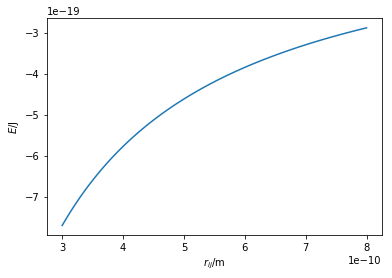

In [2]:
%matplotlib inline
from scipy.constants import e, epsilon_0
from math import pi

def Coulomb(qi, qj, r):
    return (qi * qj * e ** 2.) / (4. * pi * epsilon_0 * r)

r = np.linspace(3e-10, 8e-10, 100)
plt.plot(r, Coulomb(1, -1, r))
plt.xlabel(r'$r_{ij}$/m')
plt.ylabel(r'$E$/J')
plt.show()

Note that if $q_i$ and $q_j$ have different signs (e.g. are oppositely charged) then the value of $E_{\text{Coulomb}}$ will **always** be less then zero (e.g. attractive). It is clear that this mathematical function has clear routes in the physics of the system. 

However, the other component of the non-bonded interaction is less well defined. This is the **van der Waals** interaction, which encompasses both the attractive London dispersion effects and the repulsive Pauli exclusion principle. There are a variety of ways that the van der Waals interaction can be modelled, this week we will investigate a few of these. 

The most commonly applied is the **Lennard-Jones** potential model, which considers the attractive London dispersion effects as follows, 

$$ E_{\text{attractive}}(r_{ij}) = \frac{-B}{r_{ij}^6}, $$

where $B$ is some constant for the interaction, and $r_{ij}$ is the distance between the two atoms. The Pauli exclusion principle is a very short range repulsive interaction, and is therefore modelled with the relation, 

$$ E_{\text{repulsive}}(r_{ij}) = \frac{A}{r_{ij}^{12}}, $$

again $A$ is some interaction specific constant. The total Lennard-Jones interaction is then the linear combination of these two terms, 

$$ E_{LJ}(r_{ij}) = E_{\text{repulsive}}(r_{ij}) + E_{\text{attractive}}(r_{ij}) = \frac{A}{r_{ij}^{12}} - \frac{B}{r_{ij}^6}. $$

As was performed for the electrostatic interaction, **in the cell below** define each of the attractive, repulsive and total van der Waals interaction energies as defined by the Lennard-Jones potential and plot **all three** on a single graph, where $A = 1.363\times10^{-134}\text{ Jm}^{-12}$ and $B = 9.273\times10^{-78}\text{ Jm}^{-6}$.

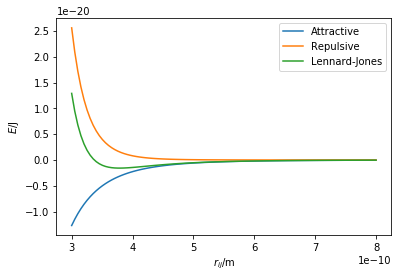

In [3]:
%matplotlib inline
def attractive(dr, b):
    return -b / np.power(r, 6)

def repulsive(dr, a):
    return a / np.power(r, 12)

def lj(dr, constants):
    return repulsive(r, constants[0]) + attractive(r, constants[1])

r = np.linspace(3e-10, 8e-10, 100)
plt.plot(r, attractive(r, 9.273e-78), label='Attractive')
plt.plot(r, repulsive(r,1.363e-134), label='Repulsive')
plt.plot(r, lj(r, [1.363e-134, 9.273e-78]), label='Lennard-Jones')
plt.xlabel(r'$r_{ij}$/m')
plt.ylabel(r'$E$/J')
plt.legend()
plt.show()

The Lennard-Jones potential is by no means the only way to model the van der Waals interaction. Another common potential model is the **Buckingham** potential, like the Lennard-Jones potential, the Buckingham models the attractive term with a power-6. However, instead of the power-12 repulsion, this is modelled with an exponential function. The total Buckingham potential is as follows, 

$$ E_{\text{Buckingham}}(r_{ij}) = A\exp{-Br_{ij}} - \frac{C}{r_{ij}^6}, $$

where $A$, $B$, and $C$ are interaction specific. N.B. these are not the same $A$ and $B$ as in the Lennard-Jones potential. 

**In the cell below**, define a Buckingham potential and plot it, where $A = 1.69\times10^{-15}\text{ J}$, $B = 3.66\times10^{10}\text{ m}$, and $C = 1.02\times10^{-77}\text{ Jm}^{-6}$.

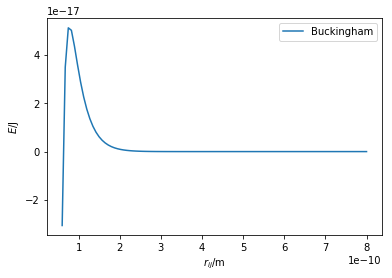

In [4]:
%matplotlib inline
def buckingham(dr, constants):
    return constants[0] * np.exp(-constants[1] * dr) - constants[2] / np.power(dr, 6)

r = np.linspace(0.6e-10, 8e-10, 100)
plt.plot(r, buckingham(r, [1.69e-15, 3.66e10, 1.02e-77]), label='Buckingham')
plt.xlabel(r'$r_{ij}$/m')
plt.ylabel(r'$E$/J')
plt.legend()
plt.show()

When the Buckingham potential is plotted from 3 Å to 10 Å, the potential looks similar to the Lennard-Jones. There is a well of ideal interatomic distance with a shallow path out as the particles move apart and a very steep incline for the particles to move closer. Now **investigate** the Buckingham potential over the range of 0.6 Å and 8 Å and comment on the interaction when $r_{ij} < 0.75\text{ Å}$. Does this appear physically realistic? **Comment** on problems that may occur when the Buckingham potential is being used at very high temperature. 

### More simplifications

The classical methods that involve modelling atoms as a series of particles with analytical mathematical functions to describe their energy is currently regularly used to model the properties of very large systems, like biological macromolecules. While these calculations are a lot faster using classical methods than quantum mechanics, for a system with 10 000 atoms, there are still nearly 50 000 000 interactions to consider. Therefore, so that our calculation run on a feasible timescale we make use of some additional simplifications. 

#### Cut-offs

If we plot the Lennard-Jones potential all the way out to 15 Å, we get something that looks like *Figure 2*. 

<center>
    <br>
    <img src="./figures/fig002.png" width="400px">
    <i>Figure 2. The Lennard-Jones potential (blue) and a line of y=0 (orange).</i>
    <br>
</center>

It is clear from Figure 2, and from our understanding of the particle interaction, that as the particle move away from each other their interaction energy tends towards 0. The concept of a cut-off suggests that if to particles are found to be very far apart ($\sim15\text{ Å}$), there is no need calculate the energy between them and it can just be taken as 0, 

$$       E(r_{ij})=\left\{
  \begin{array}{@{}ll@{}}
    \dfrac{A}{r_{ij}^{12}} - \dfrac{B}{r_{ij}^6}, & \text{if}\ a<15\text{ Å} \\
    0, & \text{otherwise.}
  \end{array}\right.
$$

This saves significant computation time, as power (e.g. power-12 and power-6 in the Lennard-Jones potential) are very computationally expensive to calculate. 

In the cell below, **modify** your Lennard-Jones and Buckingham potential functions to have a cut-off of 15 Å.

In [5]:
def lj(dr, constants):
    if dr < 15e-10:
        return repulsive(r, constants[0]) + attractive(r, constants[1])    
    else:
        return 0   

def buckingham(dr, constants):
    if dr < 15.0:
        return constants[0] * np.exp(-constants[1] * dr) - constants[2] / np.power(dr, 6)
    else:
        return 0

#### Periodic boundary conditions

Even with cut-offs, it is not straightforward to design a large enough simulation cell to represent the bulk behaviour of liquids or solids in a physically relevant way, for example what happens when the atoms interact with the walls of the cell? This is dealt with using **periodic boundary conditions**, which state that the cell being simulated is part of an infinite number of identical cells arranged in a lattice (*Figure 3*). 

<center>
    <br>
    <img src="./figures/fig003.png" width="300px">
    <i>Figure 3. A two-dimensional example of a periodic cell.</i>
    <br>
</center>

When a particle reaches the cell wall, it moves into the adjecent cell, and since all the cells are identical, it appears on the other side. **Run** the cell below to see a periodic boundary condition in action for a single cell. 

<IPython.core.display.Javascript object>


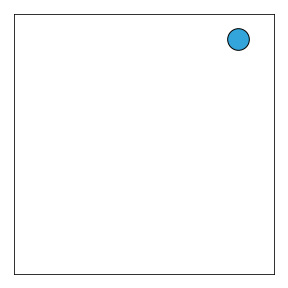

<IPython.core.display.Javascript object>


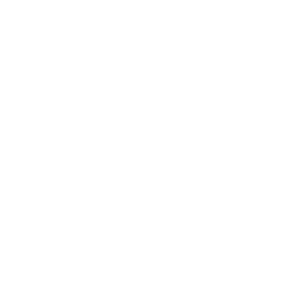

In [6]:
%matplotlib notebook
examples.pbc()

### Molecular dynamics

Having introduced the classical methods, it is now necessary to discuss how the **dynamics of molecules** are obtained. The particles that we are studying are classical in nature, therefore it is possible to apply classical mechanics to rationalise their dynamical behaviour. For this the starting point is Newton's second law of motion, 

$$ \mathbf{f} = m\mathbf{a}, $$ 

where, $\mathbf{f}$ is the force on an atom of mass, $m$, and acceleration, $\mathbf{a}$. The force between two particles, $i$ and $j$, can be found from the interaction energy, 

$$ \mathbf{f}_{ij} = \frac{-\text{d}E(r_{ij})}{\text{d}r_{ij}}. $$  

Which is to say that the force is the negative of the first derivative of the energy with respect to the distance between them. In the cell below, a new function has been defined for the Lennard-Jones energy **or** force. 

In [7]:
def lennard_jones(dr, constants, force):
    if force:
        return 12 * constants[0] * np.power(dr, -13) - (6 * constants[1] * np.power(dr, -7))
    else:
        return constants[0] * np.power(dr, -12) - (constants[1] * np.power(dr, -6))

Use the above function as a template to **define** a similar function to determine the energy **or** force from the Buckingham potential. 

In [8]:
def buckingham(dr, constants, force):
    if force:
        return constants[0] * constants[1] * np.exp(-constants[1] * dr) - 6 * constants[2] / np.power(dr, 7)
    else:
        return constants[0] * np.exp(-constants[1] * dr) - constants[2] / np.power(dr, 6)

This means for a system with two argon particles, 5 Å apart, interacting through purely the Lennard-Jones potential we can find the force, and acceleration, on each particle as **shown** in the cell below. *Note that the force and acceleration have both a magnitude and a direction (positive or negative) indicating they are vectors*.

In [9]:
force = lennard_jones(5e-10, [1.363e-134, 9.273e-78], True)
mass_of_argon = 39.948 # amu
mass_of_argon_kg = mass_of_argon * 1.6605e-27
acceleration = (force * 5e-10 / np.abs(5e-10)) / mass_of_argon_kg
print('force = {:.2e} N'.format(force))
print('acceleration = {:.2e} m/s'.format(acceleration))

force = -5.78e-12 N
acceleration = -8.72e+13 m/s


#### Integration

This means that we now know the position of the particle and the acceleration that it has, so it is only necessary to then find the velocity of the particle and we can apply the basic equations of motion to our particles,

$$ \mathbf{x}_i(t + \Delta t) = \mathbf{x}_i(t) + \mathbf{v}_i(t) + \dfrac{1}{2} \mathbf{a}_i(t)\Delta t^2, $$

$$ \mathbf{v}_i(t + \Delta t) = \mathbf{v}_i(t) + \dfrac{1}{2}\big[\mathbf{a}_i(t) + \mathbf{a}_i(t+\Delta t)\big]\Delta t, $$ 

where, $\Delta t$ is the timestep (how far in time is incremented), $\mathbf{x}_i$ is the particle position, $\mathbf{v}_i$ is the velocity, and $\mathbf{a}_i$ the acceleration. This pair of equations is known as the Velocity-Verlet algorithm, which can be written as:

1. find the position of the particle after some timestep using eqn. 10, 
2. calculate the force (and acceleration) on the particle,
3. determine a new velocity for the particle, based on the average acceleration at the current and new positions, using eqn. 11, 
4. go to 1.

This process can be continued for as long as is required to get good statistics for the quanity you are interested in (or for as long as you can wait for/afford to run the computer for).  

This process is called the integration step, and the Velocity-Verlet is the **integrator**. The Velocity-Verlet integration is numerical in nature, meaning that the accuracy of this method is dependent on the timestep, $\Delta t$, size. Small values of $\Delta t$ are capable of keeping the resultant uncertainty of the position and velocity small, these values are usually on the scale of $10^{-15}\text{ s}$ (femtoseconds). This means that to even measure a nanosecond of "real-time" molecular dynamics, 1 000 000 (one million) iterations of the above algorithm must be performed. 

In the cell below, **define** a function for eqns 10 and 11. 

In [10]:
def update_pos(x, v, a, dt):
    return x + v * dt + 0.5 * a * dt * dt

def update_velo(v, a, a1, dt):
    return v + 0.5 * (a + a1) * dt

#### Initialisation

There are only two tools left that you need to run a molecular dynamics simulation, and both are associated with the original configuration of the system; the original particle positions, and the original particle velocities. 

The particle positions are usually taken from some library of structures (e.g. the protein data bank if you are simulating proteins) or based on some knowledge of the system (e.g. CaF<sub>2</sub> is known to have a face-centred cubic structure). The particle velocities are a bit more nuanced, as the total kinetic energy, $E_K$ of the system (and therefore the particle velocities) are dependent on the temperature of the simulation, $T$. 

$$ E_K = \sum_{i=1}^N \frac{m_i|v_i|^2}{2} = \frac{3}{2}Nk_BT, $$

where $m_i$ is the mass of particle $i$, $N$ is the number of particles and $k_B$ is the Boltzmann constant. Based on this knowledge, the most common way to obtain initial velocities is to assign random values and then scale them based on the temperature of the system. For example, in the software you will use later today the initial velocity are determined as follow, 

$$ v_i = R_i \sqrt{\dfrac{2NT}{\sum{(R^2)}}}, $$

where $R_i$ is some random number between $-0.5$ and $0.5$, $\sum{(R^2)}$ is the sum of all the random numbers squared (where there is a different random number for each particle), and $N$ is the number of particles in the simulation.

In the cell below, **define** a function to generate an initial velocity for an arbitrary number of particles.

In [22]:
def init_velocity(temperature, part_numb):
    v = np.random.rand(part_numb) - 0.5
    return v * np.sqrt(temperature * 1.3806e-23)

3.4278318953357516e-10


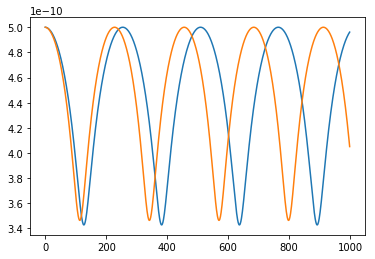

In [29]:
%matplotlib inline
x = np.array([5.0e-10, 10.0e-10])
v = init_velocity(300, 2)
a = np.array([0., 0.])
a1 = np.array([0., 0.])
force = lennard_jones(np.abs(x[1]-x[0]), [1.363e-134, 9.273e-78], True)
a[1] = (force * (x[1] - x[0]) / np.abs(x[1] - x[0])) / mass_of_argon_kg
a[0] = (force * (x[0] - x[1]) / np.abs(x[0] - x[1])) / mass_of_argon_kg
dt = 1e-14
dist = np.zeros(1000)
for i in range(0, 1000):
    m = 0
    x = update_pos(x, v, a, dt)
    for j in range(0, len(x)-1):
        for k in range(j + 1, len(x)):
            dx = x[k] - x[j]
            if np.abs(dx) > 15e-10:
                force = 0
            else:
                force = lennard_jones(np.abs(dx), [1.363e-134, 9.273e-78], True)                
            a1[k] = (force * (dx) / np.abs(dx)) / mass_of_argon_kg
            a1[j] = (force * -(dx) / np.abs(dx)) / mass_of_argon_kg
    v = update_velo(v, a, a1, dt)
    a = np.array(a1)
    dist[i] = x[1]-x[0]
    
x = np.array([5.0e-10, 10.0e-10])
v = np.array([0., 0.])
a = np.array([0., 0.])
a1 = np.array([0., 0.])
force = buckingham(np.abs(x[1]-x[0]), [1.69e-15, 3.66e10, 1.02e-77], True)
a[1] = (force * (x[1] - x[0]) / np.abs(x[1] - x[0])) / mass_of_argon_kg
a[0] = (force * (x[0] - x[1]) / np.abs(x[0] - x[1])) / mass_of_argon_kg
dt = 1e-14
dist2 = np.zeros(1000)
for i in range(0, 1000):
    m = 0
    x = update_pos(x, v, a, dt)
    for j in range(0, len(x)-1):
        for k in range(j + 1, len(x)):
            dx = x[k] - x[j]
            if np.abs(dx) > 15e-10:
                force = 0
            else:
                force = buckingham(np.abs(dx), [1.69e-15, 3.66e10, 1.02e-77], True)                
            a1[k] = (force * (dx) / np.abs(dx)) / mass_of_argon_kg
            a1[j] = (force * -(dx) / np.abs(dx)) / mass_of_argon_kg
    v = update_velo(v, a, a1, dt)
    a = np.array(a1)
    dist2[i] = x[1]-x[0]
    
plt.plot(range(0, 1000), dist)
plt.plot(range(0, 1000), dist2)
print(np.min(dist))